# Logistic Regression Theory in Binary Classification

- Below are examples for all steps of binary classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import _sigmoid, _compute_cost_logistic, gradient_descent, predict

## sigmoid() function example

In [2]:
z = np.arange(-15, 16)
y = _sigmoid(z)

Text(0.5, 0, 'z')

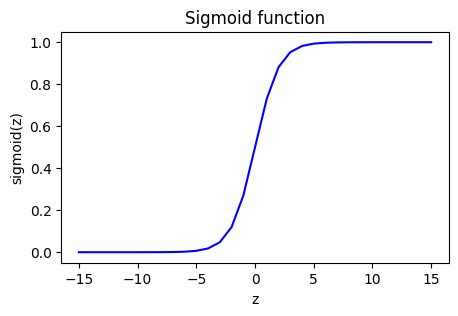

In [3]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")

## Plotting decision boundary

- If the logistic model is f(x) = g(z) where z = -3 + x<sub>0</sub> + x<sub>1</sub>, **z=0 will be the decision boundary**.

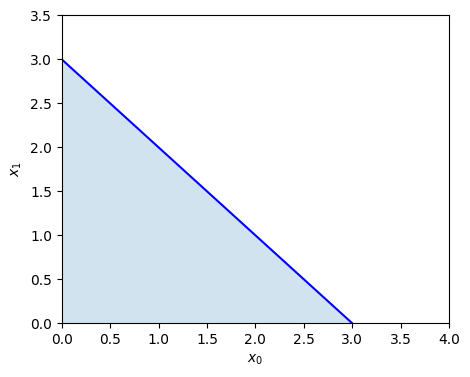

In [4]:
x0 = np.arange(0, 6)
x1 = 3 - x0

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# Plot the decision boundary
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0, x1, alpha=0.2)
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")
plt.show()

## Computing the cost function for logistic regression model

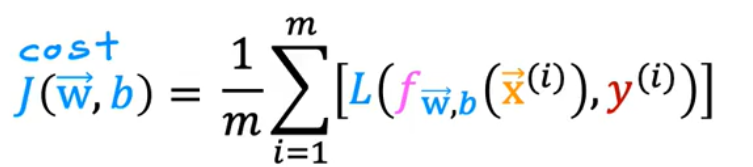

where Loss function equals:

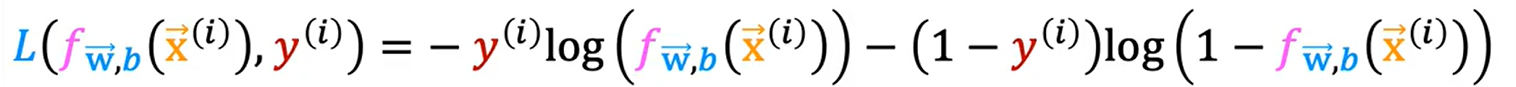

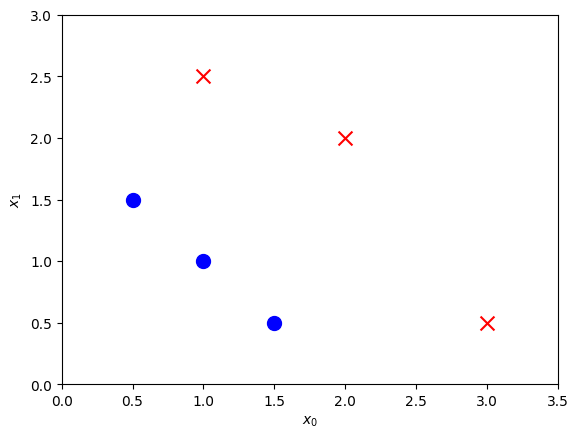

In [5]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])  
colors = ['blue', 'red']
markers = ['o', 'x']

for i in range(len(X_train)):
    plt.scatter(X_train[i, 0], X_train[i, 1], c=colors[y_train[i]], marker=markers[y_train[i]], s=100)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis([0, 3.5, 0, 3])
plt.show()

In [6]:
w_tmp = np.array([1,1])
b_tmp = -3
print(f"Cost: {_compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)}")

Cost: 0.36686678640551745


## Run gradient descent

0th cost: 0.684610468560574
1000th cost: 0.1590977666870456
2000th cost: 0.08460064176930081
3000th cost: 0.05705327279402531
4000th cost: 0.042907594216820076
5000th cost: 0.034338477298845684
6000th cost: 0.028603798022120097
7000th cost: 0.024501569608793
8000th cost: 0.02142370332569295
9000th cost: 0.019030137124109114


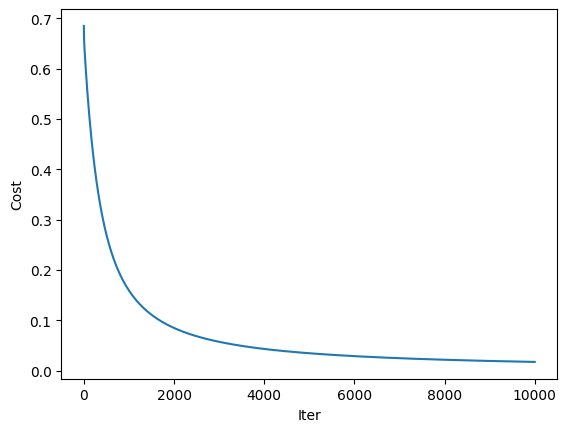

optimal parameters w:[5.28123029 5.07815608], b:-14.222409982019837


In [7]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters, plot_cost_per_iter=True) 
print(f"optimal parameters w:{w_out}, b:{b_out}")

0th cost: 0.6846857000420554
1000th cost: 0.520332141456904
2000th cost: 0.5203016151380848
3000th cost: 0.5203016077007423
4000th cost: 0.5203016076989254
5000th cost: 0.5203016076989251
6000th cost: 0.5203016076989251
7000th cost: 0.5203016076989251
8000th cost: 0.520301607698925
9000th cost: 0.520301607698925


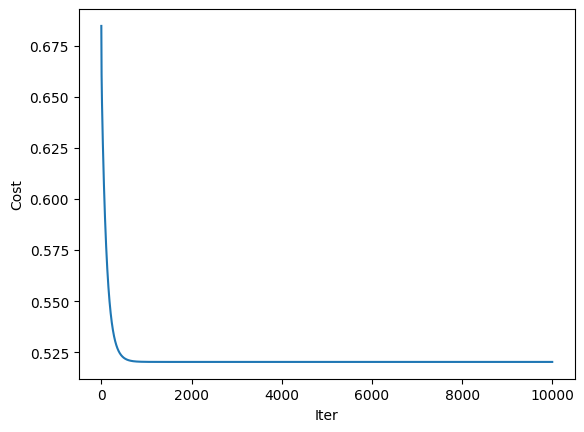

optimal parameters w:[0.90411532 0.73588062], b:-2.3337541849928076


In [8]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
iters = 10000

w_out_reg, b_out_reg = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters, plot_cost_per_iter=True, lambda_=1) 
print(f"optimal parameters w:{w_out_reg}, b:{b_out_reg}")

## Plot result for visualization

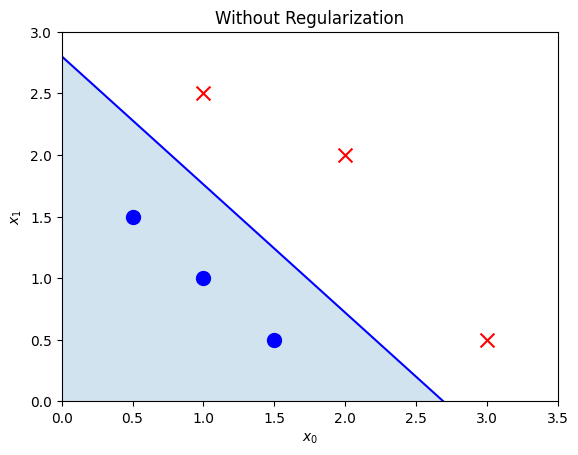

In [9]:
x0 = np.arange(0, 4)
x1 = (- b_out - w_out[0] * x0) / w_out[1] 
plt.plot(x0, x1, c="b")
plt.fill_between(x0, x1, alpha=0.2)

for i in range(len(X_train)):
    plt.scatter(X_train[i, 0], X_train[i, 1], c=colors[y_train[i]], marker=markers[y_train[i]], s=100)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis([0, 3.5, 0, 3])
plt.title("Without Regularization")
plt.show()

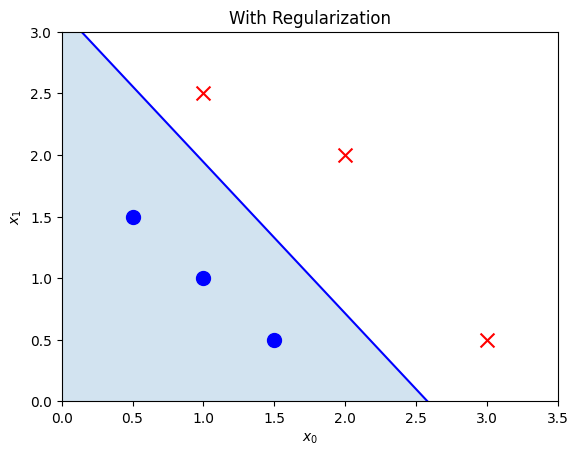

In [10]:
x0 = np.arange(0, 4)
x1 = (- b_out_reg - w_out_reg[0] * x0) / w_out_reg[1] 
plt.plot(x0, x1, c="b")
plt.fill_between(x0, x1, alpha=0.2)

for i in range(len(X_train)):
    plt.scatter(X_train[i, 0], X_train[i, 1], c=colors[y_train[i]], marker=markers[y_train[i]], s=100)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis([0, 3.5, 0, 3])
plt.title("With Regularization")
plt.show()

## Predict new examples

Prediction: [1 0 1 0]


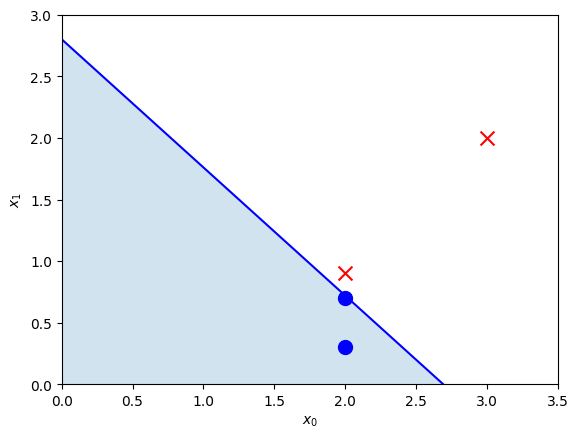

In [11]:
X_new = np.array([[3.0, 2.0], [2.0, 0.7], [2.0, 0.9], [2.0, 0.3]])
y_new = predict(X_new, w_out, b_out).astype(np.uint32)
print(f"Prediction: {y_new}")
    
x0 = np.arange(0, 4)
x1 = (- b_out - w_out[0] * x0) / w_out[1] 
plt.plot(x0, x1, c="b")
plt.fill_between(x0, x1, alpha=0.2)

for i in range(len(X_new)):
    plt.scatter(X_new[i, 0], X_new[i, 1], c=colors[y_new[i]], marker=markers[y_new[i]], s=100)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis([0, 3.5, 0, 3])
plt.show()